# Sample Test: Transpiler

qiskit.transpiler

https://quantum.cloud.ibm.com/docs/en/api/qiskit/transpiler

https://quantum.cloud.ibm.com/docs/en/guides/transpiler-stages

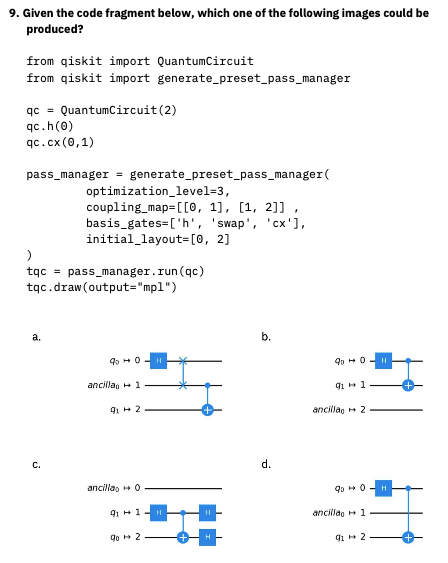

## Thoughts about the answer:

**Ancilla qubit = helping qubit**

Ancilla qubits serve as a link between the quantum world of data qubits and the classical world of measurement, making them an essential component of quantum computing. 

Their main characteristic is that they can retrieve mistake information without destroying the data qubits’ sensitive quantum state.

**optimization_level=3,**

optimization_level=0 -> no decomposition

optimization_level=1 -> this stage prepares Optimize1qGatesDecomposition and CXCancellation, which combine chains of single-qubit gates and cancel any back-to-back CNOT gates.

optimiuation_level=2 -> this stage uses the CommutativeCancellation pass instead of CXCancellation, which removes redundant gates by exploiting commutation relations.

optimization_level=3 -> this stage prepares the following passes:
        
        Collect2qBlocks
        
        ConsolidateBlocks
        
        UnitarySynthesis
       
        Optimize1qGateDecomposition
       
        CommutativeCancellation

Additionally, this stage also executes a few final checks to make sure that all instructions in the circuit are composed of the basis gates available on the target backend.

coupling_map=[[0, 1], [1, 2]] 
-> connection between qubit 0 - 1 and qubit 1 - 2

initial_layout=[0, 2] -> ancilla qubit is at position 1

Here the ancilla qubit 1 is introduced, because the circuit should run between qbit 0 and qubit 2. They are physically not adjacent to each other.

In [18]:
from qiskit import QuantumCircuit
from qiskit import generate_preset_pass_manager

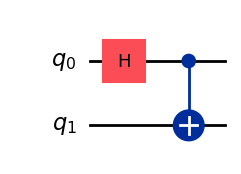

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl")

# Bell State

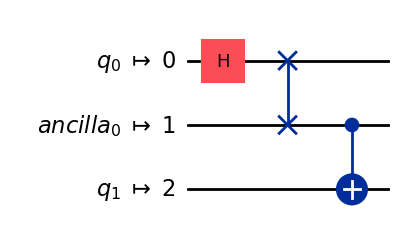

In [22]:
pass_manager = generate_preset_pass_manager(
optimization_level=3,
coupling_map=[[0, 1], [1, 2]] ,
basis_gates=['h', 'swap', 'cx'],
initial_layout=[0, 2]
)
tqc = pass_manager.run(qc)
tqc.draw(output="mpl")